In [3]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.table import Table
from collections import defaultdict

In [6]:
#list = fits.open("/home/keigon/tigress/ReducedData/May_2019_run3/rerun/rerun_3/arc/wlFitData/2019-05-06/v0017071/wlFitData-017071-r1.fits")
list = fits.open("/Users/naka.keigo/Desktop/integ/INTEGRATION/rerun/integration/arc/wlFitData/2019-03-22/v0000031/wlFitData-000031-b1.fits")

In [7]:
header=list[0].header

In [8]:
list.info()

Filename: /Users/naka.keigo/Desktop/integ/INTEGRATION/rerun/integration/arc/wlFitData/2019-03-22/v0000031/wlFitData-000031-b1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  WLFITDATA     1 BinTableHDU     28   4238R x 9C   [J, D, D, D, D, D, D, D, J]   


In [9]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [10]:
print(list[1].data)

[ (650,  633.61791,  3857.63441521,  3843.390625  ,  633.6517334 ,  1.13480842,  0.07707013,  0.03770314, 1)
 (650,  638.4756 ,  3929.16080132,  3917.82250977,  638.50396729,  0.86967909,  0.05906396,  0.03887516, 1)
 (650,  640.4018 ,  3957.52286743,  3947.40380859,  640.42919922,  0.67175162,  0.04562178,  0.03959721, 1)
 ...,
 (  2,  649.743  ,  4095.05305476,  4088.98095703,  649.61834717,  2.14953518,  0.14598619, -0.01535359, 1)
 (  2,  650.037  ,  4099.38198015,  4094.08129883,  649.94775391,  0.        ,  0.        , -0.01618718, 1)
 (  2,  650.037  ,  4099.38198015,  4094.08129883,  649.94775391,  0.        ,  0.        , -0.01618718, 1)]


In [12]:
fiberId=list[1].data["fiberId"]
nominalPixelPos=list[1].data["nominalPixelPos"]
fitPixelPos=list[1].data["fitPixelPos"]
fitWavelength=list[1].data["fitWavelength"]
wavelengthCorr=list[1].data["wavelengthCorr"]
reflines=list[1].data["reflines"]
status=list[1].data["status"]
rows = np.arange(len(reflines), dtype='float32')

In [13]:
yResid = fitWavelength-reflines
dataItems = [(status==1, 'o', 'green', 'used'), (status == 2, 'o', 'blue', 'reserved'), (status == 8, '+', 'red', 'clipped')]

In [14]:
useds = []
reserveds = []
clippeds = []


for id in set(fiberId):
    used = [i for i, x in enumerate(zip(fiberId,status)) if x==(id,1)]
    reserved = [i for i, x in enumerate(zip(fiberId,status)) if x==(id,5)]
    clipped = [i for i, x in enumerate(zip(fiberId,status)) if x==(id,3)]
 
    useds.append(used)
    reserveds.append(reserved)
    clippeds.append(clipped)


0.116885519613 0.141430393394
0.124727534513 0.11746014285
0.12326309496 0.114234376992
0.129525984799 0.1587254539
0.125284654563 0.132402791133
0.126082926849 0.14250655227
0.118807862315 0.0882218228814
0.12167529162 0.114644551473
0.11885452582 0.0978947930746
0.126392116582 0.156845394734


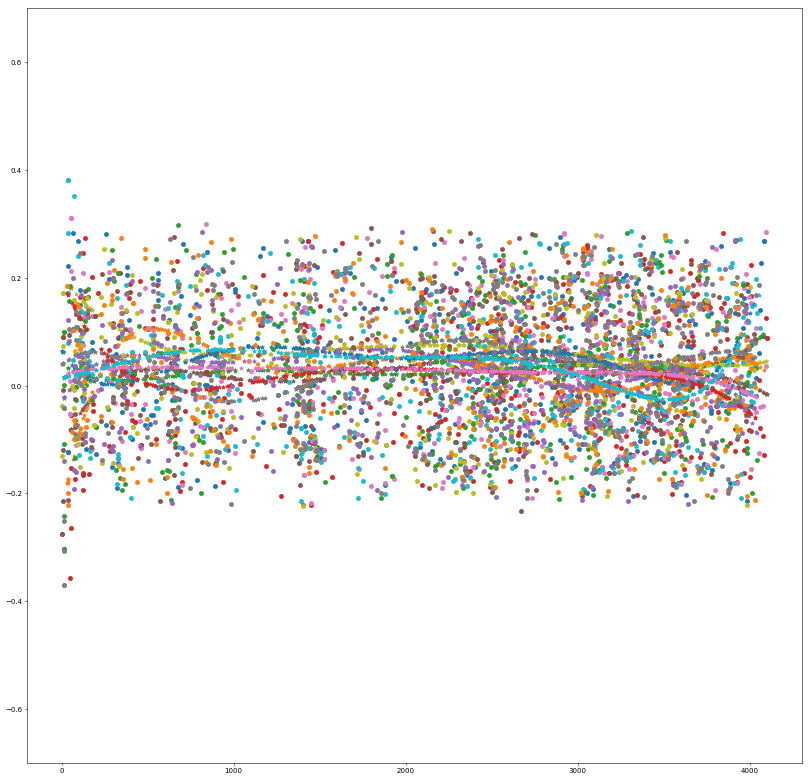

In [18]:
plt.figure(figsize=(20, 20), dpi=50)
plt.ylim(-0.7,0.7)

for id ,x in enumerate(set(fiberId)):
    plt.plot(nominalPixelPos[useds[id]],reflines[useds[id]]-fitWavelength[useds[id]],"o")
    plt.plot(nominalPixelPos[reserveds[id]],reflines[reserveds[id]]-fitWavelength[reserveds[id]],"o")
    plt.plot(nominalPixelPos[useds[id]],wavelengthCorr[useds[id]],"*")

    rmsUsed = np.sqrt(np.sum(((reflines- fitWavelength)**2)[useds[id]])/(len(useds[id])))
    rmsReserved = np.sqrt(np.sum(((reflines - fitWavelength)**2)[reserveds[id]])/len(reserveds[id]))
    print(rmsUsed, rmsReserved )

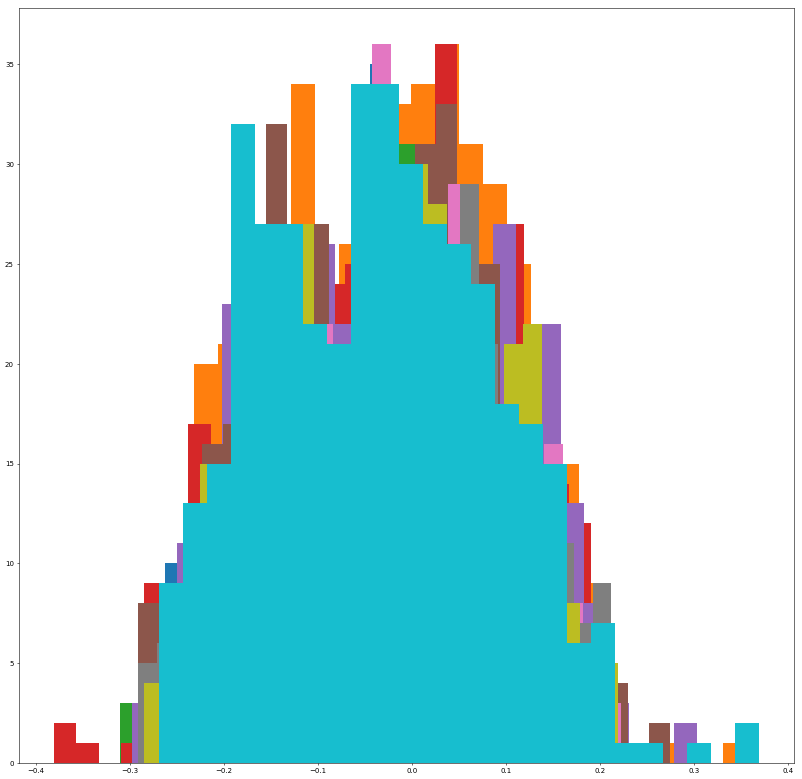

In [24]:
plt.figure(figsize=(20, 20), dpi=50)

for id ,x in enumerate(set(fiberId)):
    plt.hist(fitWavelength[useds[id]]-reflines[useds[id]],25)


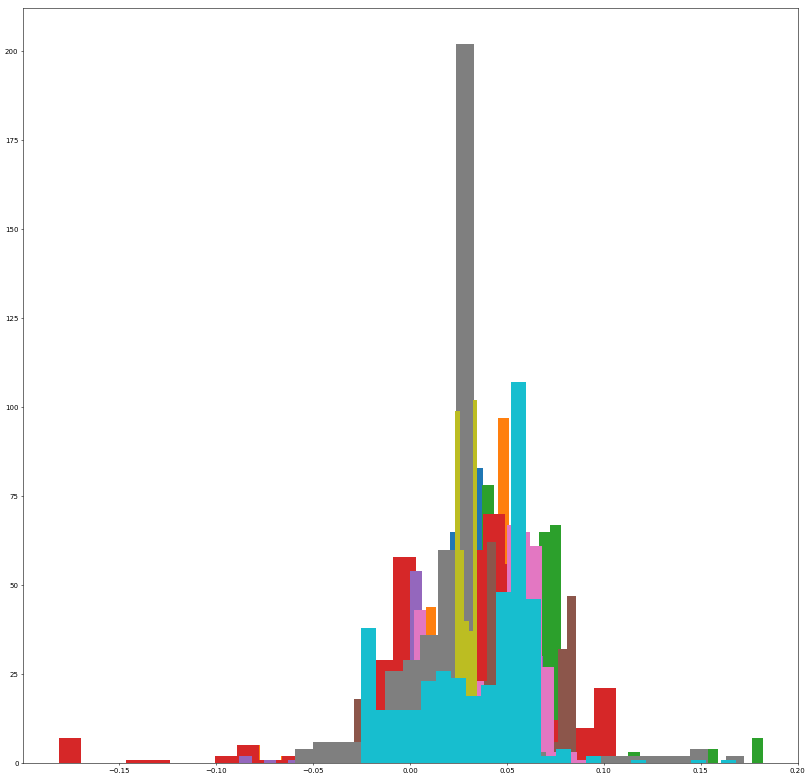

In [25]:
plt.figure(figsize=(20, 20), dpi=50)

for id ,x in enumerate(set(fiberId)):
    plt.hist(wavelengthCorr[useds[id]],25)

In [32]:
from lsst.daf.persistence import Butler
butlers = Butler("/Users/naka.keigo/Desktop/integ/INTEGRATION/rerun/integration/arc/")

In [33]:
# import arc, fibertrace and detectormap object 
arc = butlers.get("pfsArm", visit=31, arm="r", spectrograph=1)
ft= butlers.get("fibertrace", visit=31, arm="r", spectrograph=1)
dm= butlers.get("detectormap", visit=31, arm="r", spectrograph=1)

#arc = butler.get("pfsArm", visit=17071, arm="r", spectrograph=1)
#ft= butler.get("fibertrace", visit=17071, arm="r", spectrograph=1)
#dm= butler.get("detectormap", visit=17071, arm="r", spectrograph=1)



plt.figure(figsize=(20,10))

plt.subplot(211)
for i in range(10):
    plt.plot(arc.wavelength[i],arc.flux[i],alpha=0.5)
plt.ylim(0,1)
plt.title('integration test')

plt.subplot(212)
for i in range(10):
    plt.plot(arc.wavelength[i][2500:3000],arc.flux[i][2500:3000],alpha=0.5)
plt.ylim(0,0.1)
#plt.xlim(898,900)

AttributeError: module 'pfs' has no attribute 'datamodel'